In [8]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

In [2]:
# scraper code resource: Ömer Sakarya (https://github.com/arapfaik/scraping-glassdoor-selenium)

def get_jobs(num_jobs, verbose):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path="C:/Users/Diwaker Rathore/Downloads/chromedriver_win32/chromedriver", options=options)
    driver.set_window_size(1120, 1000)

    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=&locT=N&locId=115&jobType=&context=Jobs&sc.keyword=data+scientist&dropdown=0"
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(10)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass


        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(5)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(10)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="css-1uyte9r css-hca4ks e1wijj242"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                industry = -1
                sector = -1
                revenue = -1

                
            if verbose:
                print("Size: {}".format(size))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Size" : size,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.

In [4]:
data_final = get_jobs(200, False)
data_final

Progress: 0/200
Progress: 1/200
Progress: 2/200
Progress: 3/200
Progress: 4/200
Progress: 5/200
Progress: 6/200
Progress: 7/200
Progress: 8/200
Progress: 9/200
Progress: 10/200
Progress: 11/200
Progress: 12/200
Progress: 13/200
Progress: 14/200
Progress: 15/200
Progress: 16/200
Progress: 17/200
Progress: 18/200
Progress: 19/200
Progress: 20/200
Progress: 21/200
Progress: 22/200
Progress: 23/200
Progress: 24/200
Progress: 25/200
Progress: 26/200
Progress: 27/200
Progress: 28/200
Progress: 29/200
Progress: 30/200
Progress: 31/200
Progress: 32/200
Progress: 33/200
Progress: 34/200
Progress: 35/200
Progress: 36/200
Progress: 37/200
Progress: 38/200
Progress: 39/200
Progress: 40/200
Progress: 41/200
Progress: 42/200
Progress: 43/200
Progress: 44/200
Progress: 45/200
Progress: 46/200
Progress: 47/200
Progress: 48/200
Progress: 49/200
Progress: 50/200
Progress: 51/200
Progress: 52/200
Progress: 53/200
Progress: 54/200
Progress: 55/200
Progress: 56/200
Progress: 57/200
Progress: 58/200
Progres

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Data Scientist,-1,This project requires a motivated data scienti...,-1,"BreathX Technologies Inc, ( Canary Health Tech...",Bangalore,Unknown,-1,-1,Less than $1 million (USD)
1,Data Scientist,-1,"Company Profile:\nAt DXFactor, we are bringing...",-1,DXFactor Solutions Pvt Ltd,Ahmedabad,-1,-1,-1,-1
2,Data Scientist,-1,"Job Summary:\nIn this role, you should be high...",3.0,Unusual Hire\n3.0,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD)
3,Data Scientist,-1,Skill requirements\nPython\nOther software - A...,-1,AlpsLogic IT Solutions,Gāndhīnagar,-1,-1,-1,-1
4,Data Scientist - AI/ML,-1,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$5 to $10 billion (USD)
...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD)
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD)
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD)
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable


In [5]:
data_final.to_csv('glassdoor_jobs.csv', index = False)

In [9]:
data = pd.read_csv('glassdoor_jobs.csv')
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Data Scientist,-1,This project requires a motivated data scienti...,-1.0,"BreathX Technologies Inc, ( Canary Health Tech...",Bangalore,Unknown,-1,-1,Less than $1 million (USD)
1,Data Scientist,-1,"Company Profile:\nAt DXFactor, we are bringing...",-1.0,DXFactor Solutions Pvt Ltd,Ahmedabad,-1,-1,-1,-1
2,Data Scientist,-1,"Job Summary:\nIn this role, you should be high...",3.0,Unusual Hire\n3.0,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD)
3,Data Scientist,-1,Skill requirements\nPython\nOther software - A...,-1.0,AlpsLogic IT Solutions,Gāndhīnagar,-1,-1,-1,-1
4,Data Scientist - AI/ML,-1,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$5 to $10 billion (USD)
...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD)
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD)
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD)
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable


In [10]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue'],
      dtype='object')

In [11]:
data['Salary Estimate'].unique()

array(['-1', '₹535K - ₹709K (Employer est.)',
       '₹442K - ₹1,000K (Employer est.)', '₹144K (Employer est.)',
       '₹1,500K - ₹2,000K (Employer est.)',
       '₹800K - ₹1,600K (Employer est.)', '₹600K (Employer est.)'],
      dtype=object)

In [12]:
data = data[data['Salary Estimate'] != '-1']
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
30,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1
31,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
32,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD)
33,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD)
34,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD)
...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD)
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD)
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD)
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable


In [13]:
salary = data['Salary Estimate'].apply(lambda x: x.split(" (")[0])
salary = salary.apply(lambda x: x.replace('K','').replace('₹','').replace(',',''))

In [14]:
salary.unique()

array(['535 - 709', '442 - 1000', '144', '1500 - 2000', '800 - 1600',
       '600'], dtype=object)

In [15]:
salary = salary.apply(lambda x: x.split(' - '))
salary

30     [535, 709]
31     [535, 709]
32     [535, 709]
33     [535, 709]
34     [535, 709]
          ...    
195         [600]
196         [600]
197         [600]
198         [600]
199         [600]
Name: Salary Estimate, Length: 170, dtype: object

In [16]:
average_salary = []
for i in salary:
    if i[0] == '144':
        average_salary.append(144)
    elif i[0] == '600':
        average_salary.append(600)
    else:
        avg_sal = (int(i[0]) + int(i[1]))/2
        average_salary.append(avg_sal)
average_salary

[622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 622.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 721.0,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1750.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0

In [17]:
data['average_salary'] = average_salary
data

<ipython-input-17-f85c0ae4735e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['average_salary'] = average_salary


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,average_salary
30,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,622.0
31,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,622.0
32,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),622.0
33,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),622.0
34,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),622.0
...,...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD),600.0
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD),600.0
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD),600.0
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,600.0


In [18]:
data['company'] = data['Company Name'].apply(lambda x: x.split("\n")[0])
data

<ipython-input-18-073ac44a9b1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company'] = data['Company Name'].apply(lambda x: x.split("\n")[0])


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,average_salary,company
30,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,622.0,Rebalance Technologies LLP
31,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,622.0,Terra Economics & Analytics Lab (TEAL)
32,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),622.0,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED
33,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),622.0,Accenture
34,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),622.0,Spotflock
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD),600.0,SAP
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD),600.0,Techvantage Systems
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD),600.0,Barclays
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,600.0,Hewlett Packard Enterprise


In [19]:
data['Location'].unique()

array(['India', 'New Delhi', 'Bangalore', 'Gurgaon', 'Telangana',
       'Remote', 'Ahmedabad', 'Delhi', 'Hyderābād', 'Pune', 'Mumbai',
       'Chennai', 'Jaipur', 'Karnataka', 'Maharashtra', 'Coimbatore',
       'Tiruchchirāppalli', 'Calcutta', 'Noida', 'Ambāla', 'Cochin',
       'Navi Mumbai', 'Mohali', 'Calicut', 'Gāndhīnagar',
       'Thiruvananthapuram'], dtype=object)

In [20]:
data['python'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['spark'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
data['sql'] = data['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
data['ms_excel'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
data['tableau'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
data['aws'] = data['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

<ipython-input-20-a7afc0223449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['python'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
<ipython-input-20-a7afc0223449>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spark'] = data['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
<ipython-input-20-a7afc0223449>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [21]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,average_salary,company,python,spark,sql,ms_excel,tableau,aws
30,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,622.0,Rebalance Technologies LLP,1,0,0,0,1,0
31,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,622.0,Terra Economics & Analytics Lab (TEAL),1,0,1,1,1,0
32,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),622.0,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED,1,1,1,0,1,0
33,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),622.0,Accenture,0,0,0,0,0,0
34,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),622.0,Spotflock,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Data Scientist- AI/ML - Contract to Revenue,₹600K (Employer est.),Requisition ID: 249298\nWork Area: Software-De...,4.6,SAP\n4.6,Bangalore,10000+ Employees,Computer Hardware & Software,Information Technology,$10+ billion (USD),600.0,SAP,1,0,0,0,1,0
196,Intern/Junior Data Scientist,₹600K (Employer est.),Techvantage Analytics is a product engineering...,4.1,Techvantage Systems\n4.1,Thiruvananthapuram,1 to 50 Employees,-1,-1,Less than $1 million (USD),600.0,Techvantage Systems,0,0,0,0,0,0
197,Data Scientist,₹600K (Employer est.),Job Title:Data Scientist\nLocation: Pune\nProj...,3.9,Barclays\n3.9,Pune,10000+ Employees,Banks & Credit Unions,Finance,$10+ billion (USD),600.0,Barclays,1,0,0,1,1,1
198,Data Scientist,₹600K (Employer est.),Develops and programs integrated software algo...,3.9,Hewlett Packard Enterprise\n3.9,Bangalore,10000+ Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,600.0,Hewlett Packard Enterprise,0,0,0,0,0,0


In [22]:
data.to_csv('glassdoor_jobs_cleaned.csv', index = False)

In [23]:
dataset = pd.read_csv('glassdoor_jobs_cleaned.csv')
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,average_salary,company,python,spark,sql,ms_excel,tableau,aws
0,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,622.0,Rebalance Technologies LLP,1,0,0,0,1,0
1,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,622.0,Terra Economics & Analytics Lab (TEAL),1,0,1,1,1,0
2,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),622.0,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED,1,1,1,0,1,0
3,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),622.0,Accenture,0,0,0,0,0,0
4,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),622.0,Spotflock,1,0,0,0,1,0


In [73]:
tools = ['python', 'excel', 'sas', 'spark', 'bigml', 'java', 'ruby', 'pearl', 'matlab', 'tableau', 'ms access', 'sql', 'hadoop', 'hive', 'qlikview', 'power bi', 'google analytics', 'rstudio', 'julia', 'spss', 'c++', 'nosql','']
softwares = []
for desc in dataset['Job Description']:
    software = []
    for tool in tools:
        if tool in desc.lower():
            software.append(tool)
    softwares.append(software)
for job in softwares:
    if job == ['']:
        job.append('others')
softwares

[['python', ''],
 ['python', 'excel', 'sql', ''],
 ['python', 'spark', 'java', 'tableau', 'sql', 'hadoop', 'c++', ''],
 ['', 'others'],
 ['python', ''],
 ['python', 'excel', 'java', 'tableau', 'sql', 'hadoop', 'c++', ''],
 ['python', ''],
 ['', 'others'],
 ['', 'others'],
 ['python', ''],
 ['python', 'sql', ''],
 ['python', 'excel', 'sql', ''],
 ['', 'others'],
 ['python', ''],
 ['', 'others'],
 ['python', 'excel', 'spark', 'java', ''],
 ['python', 'sas', 'matlab', ''],
 ['', 'others'],
 ['python', 'power bi', ''],
 ['python', 'tableau', 'sql', ''],
 ['python', 'excel', 'power bi', ''],
 ['python', 'tableau', 'sql', ''],
 ['python', 'excel', 'ruby', 'sql', 'hadoop', 'hive', 'nosql', ''],
 ['', 'others'],
 ['python', 'sql', 'nosql', ''],
 ['python', 'tableau', ''],
 ['python', 'sql', ''],
 ['python', 'sql', ''],
 ['python', 'excel', ''],
 ['python', ''],
 ['python', 'sql', ''],
 ['python', 'excel', 'spark', 'java', ''],
 ['python', ''],
 ['excel', 'sql', ''],
 ['python', 'excel', 'spark

In [75]:
dataset['tools_required'] = softwares
dataset.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,average_salary,company,python,spark,sql,ms_excel,tableau,aws,tools_required
0,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,622.0,Rebalance Technologies LLP,1,0,0,0,1,0,"[python, ]"
1,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,622.0,Terra Economics & Analytics Lab (TEAL),1,0,1,1,1,0,"[python, excel, sql, ]"
2,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),622.0,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED,1,1,1,0,1,0,"[python, spark, java, tableau, sql, hadoop, c+..."
3,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),622.0,Accenture,0,0,0,0,0,0,"[, others]"
4,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),622.0,Spotflock,1,0,0,0,1,0,"[python, ]"


In [76]:
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [77]:
sns.set_style("darkgrid")

In [78]:
dataset.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'average_salary', 'company', 'python', 'spark', 'sql', 'ms_excel',
       'tableau', 'aws', 'tools_required'],
      dtype='object')

In [79]:
dataset['Job Title'].unique()

array(['Data Scientist',
       'CN - Strategy - MC - T&O - OA Data Scientist (Advanced Analytics) - 11',
       'ML Engineer/ Data Scientist', 'Sr. Data Scientist',
       'Data Scientist (Intern)', 'Data Science Internship',
       'Machine Learning Engineer', 'Senior Data Scientist',
       'Data Analytics Internship', 'Manager - Data Scientist',
       'Data Science Engineer (NLP)', 'AI Engineer', 'Data scientist',
       'Data Analytics (Market) Internship', 'Junior Data Scientist',
       'Data Analyst /Data Scientist', 'ML Engineer',
       'Data Scientist: NLP',
       'Data Scientist (NLP) for a Product Based Edutech Company',
       'Data Scientist_TS', 'Data Science Intern',
       'Data & Analytics _BODS/Informatica/Guidewire_44_3',
       'Machine Learning Developer - Data Scientist',
       'Data Scientist/Analyst - Machine Learning/Deep Learning',
       'NLP Scientist', 'Data Scientist / Analyst',
       'Trainer-Data Science', 'Data Scientist 2',
       'Computer Visio

In [33]:
def title_job(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'MLE'
    elif 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [80]:
dataset['job_title_simp'] = dataset['Job Title'].apply(title_job)
dataset.job_title_simp.value_counts()

data scientist    128
na                 20
data engineer      12
analyst             9
manager             1
Name: job_title_simp, dtype: int64

In [81]:
dataset['seniority'] = dataset['Job Title'].apply(seniority)
dataset.seniority.value_counts()

na        155
senior     12
junior      3
Name: seniority, dtype: int64

In [82]:
dataset.describe()

,Rating,average_salary,python,spark,sql,ms_excel,tableau,aws
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2.589412,853.588235,0.670588,0.194118,0.388235,0.294118,0.670588,0.158824
std,2.182964,523.046612,0.471388,0.396688,0.488788,0.456991,0.471388,0.366591
min,-1.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,721.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.100000,1200.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,5.000000,1750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
dataset.to_csv('glassdoor_data_cleaned.csv', index = False)

In [86]:
df = pd.read_csv('glassdoor_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,...,company,python,spark,sql,ms_excel,tableau,aws,tools_required,job_title_simp,seniority
0,Data Scientist,₹535K - ₹709K (Employer est.),About the Company:\nWe are passionate about or...,-1.0,Rebalance Technologies LLP,India,-1,-1,-1,-1,...,Rebalance Technologies LLP,1,0,0,0,1,0,"['python', '']",data scientist,na
1,Data Scientist,₹535K - ₹709K (Employer est.),"As a Data Scientist at TEAL, you'll be taking ...",4.9,Terra Economics & Analytics Lab (TEAL)\n4.9,New Delhi,1 to 50 Employees,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,...,Terra Economics & Analytics Lab (TEAL),1,0,1,1,1,0,"['python', 'excel', 'sql', '']",data scientist,na
2,Data Scientist,₹535K - ₹709K (Employer est.),We're looking for a data & impact driven indiv...,3.1,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED\n3.1,Bangalore,1 to 50 Employees,-1,-1,Less than $1 million (USD),...,ITSS RESEARCH & CONSULTANCY PRIVATE LIMITED,1,1,1,0,1,0,"['python', 'spark', 'java', 'tableau', 'sql', ...",data scientist,na
3,CN - Strategy - MC - T&O - OA Data Scientist (...,₹535K - ₹709K (Employer est.),Job Description\nAbout Accenture:\nAccenture i...,3.9,Accenture\n3.9,Gurgaon,10000+ Employees,Consulting,Business Services,$10+ billion (USD),...,Accenture,0,0,0,0,0,0,"['', 'others']",data scientist,na
4,ML Engineer/ Data Scientist,₹535K - ₹709K (Employer est.),Spotflock is an AI products company to enable ...,4.0,Spotflock\n4.0,Telangana,Unknown,-1,-1,Less than $1 million (USD),...,Spotflock,1,0,0,0,1,0,"['python', '']",data scientist,na


In [87]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'average_salary', 'company', 'python', 'spark', 'sql', 'ms_excel',
       'tableau', 'aws', 'tools_required', 'job_title_simp', 'seniority'],
      dtype='object')

<AxesSubplot:>

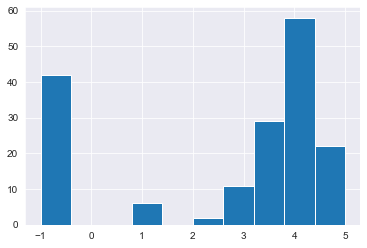

In [88]:
df.Rating.hist()

### Histogram for ratings clearly forms the normal distribution.

<AxesSubplot:>

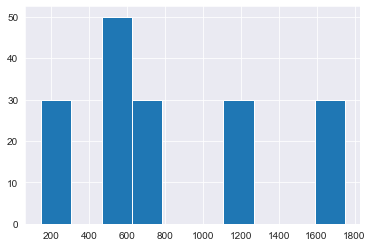

In [89]:
df.average_salary.hist()

<AxesSubplot:>

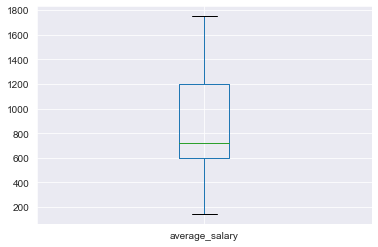

In [92]:
df.boxplot(column = ['average_salary'])

<AxesSubplot:>

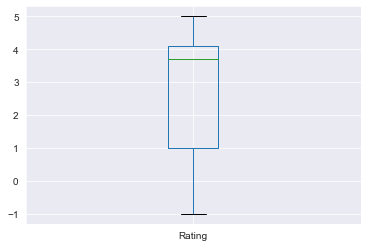

In [91]:
df.boxplot(column = ['Rating'])

###  Boxplots shows no outliers for average salary and ratings. 

In [97]:
df[['average_salary', 'Rating']].corr()

,average_salary,Rating
average_salary,1.000000,0.020104
Rating,0.020104,1.000000


In [98]:
seniority_counts = df.seniority.value_counts()
seniority_counts

na        155
senior     12
junior      3
Name: seniority, dtype: int64

([<matplotlib.patches.Wedge at 0xa7ceb98>,
 [Text(1.0580081842794187, -0.30102937065636576, 'na'),
  Text(-1.039702159245981, 0.3591927338619826, 'senior'),
  Text(-1.0983099563620646, 0.06095276659807995, 'junior')],
 [Text(0.5770953732433193, -0.16419783853983586, '91.2%'),
  Text(-0.5671102686796259, 0.1959233093792632, '7.1%'),
  Text(-0.5990781580156715, 0.0332469635989527, '1.8%')])

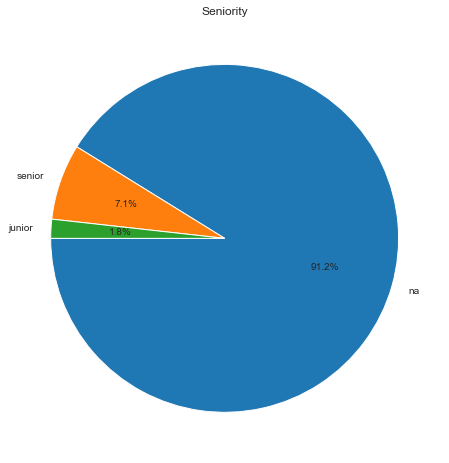

In [99]:
plt.figure(figsize = (15,8))
plt.title('Seniority')
plt.pie(seniority_counts, labels = seniority_counts.index, autopct='%1.1f%%', startangle=180)

### More than 90% of job postings don't have seniority level mentioned in their job description.

In [100]:
job_title_counts = df.job_title_simp.value_counts()
job_title_counts

data scientist    128
na                 20
data engineer      12
analyst             9
manager             1
Name: job_title_simp, dtype: int64

([<matplotlib.patches.Wedge at 0xaa04ca0>,
 [Text(0.7849712055027888, -0.770597305037786, 'data scientist'),
  Text(-0.4162522506578221, 1.0182013866727435, 'na'),
  Text(-0.9132024985739958, 0.6132382869637311, 'data engineer'),
  Text(-1.0773507704429168, 0.22207052354162998, 'analyst'),
  Text(-1.0998121779348913, 0.020326663919864835, 'manager')],
 [Text(0.42816611209243016, -0.4203258027478833, '75.3%'),
  Text(-0.22704668217699386, 0.5553825745487692, '11.8%'),
  Text(-0.498110453767634, 0.33449361107112596, '7.1%'),
  Text(-0.5876458747870456, 0.1211293764772527, '5.3%'),
  Text(-0.5998975516008498, 0.011087271229017183, '0.6%')])

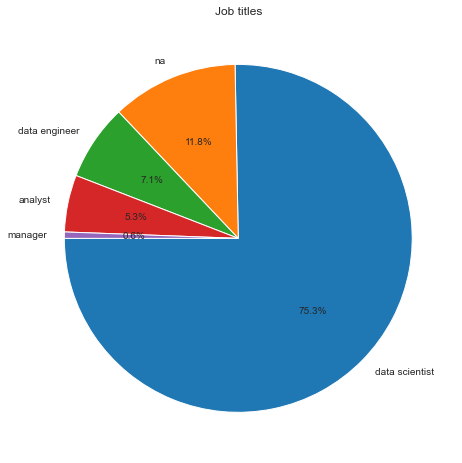

In [101]:
plt.figure(figsize = (15,8))
plt.title('Job titles')
plt.pie(job_title_counts, labels = job_title_counts.index, autopct='%1.1f%%', startangle=180)

### Pie chart shows the percentage wise distribution of different job profiles in the job postings under Data Science category.

In [104]:
tools_counts = df.tools_required.value_counts()
tools_counts.unique

<bound method Series.unique of ['', 'others']                                                                  40
['python', '']                                                                  21
['python', 'sql', '']                                                           12
['excel', '']                                                                    7
['python', 'excel', 'sql', '']                                                   4
                                                                                ..
['python', 'excel', 'spark', 'matlab', 'sql', 'hadoop', 'hive', 'nosql', '']     1
['python', 'matlab', 'sql', 'hadoop', 'hive', '']                                1
['python', 'excel', 'ruby', 'tableau', 'sql', '']                                1
['python', 'excel', 'spark', 'tableau', 'power bi', '']                          1
['python', 'excel', 'matlab', 'qlikview', '']                                    1
Name: tools_required, Length: 68, dtype: int64>

## Model building: yet to be done (will be updating soon)

### Resources:

1- Ken Jee Youtube (https://www.youtube.com/channel/UCiT9RITQ9PW6BhXK0y2jaeg)

2- Glassdoor scraper code resource: Ömer Sakarya (https://github.com/arapfaik/scraping-glassdoor-selenium)